In [ ]:
# Montar unidad drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive



# TFM - Modelos de Propensión para Campañas Comerciales

**Autor:** Grupo 4

---

## 1. Carga de librerías


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")


---

## 2. Carga del dataset


In [3]:
df = pd.read_csv("./customer_shopping_data_v4.csv", delimiter=';')


---

## 3. Análisis exploratorio



---

### 3.1 Análisis de columnas


In [5]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Valores nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas descriptivas generales
print("\nEstadísticas descriptivas:")
print(df.describe())



Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499965 entries, 0 to 499964
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Factura           499965 non-null  object 
 1   ID_Cliente        499965 non-null  object 
 2   Categoría         499965 non-null  object 
 3   Cantidad          499965 non-null  int64  
 4   Importe           499965 non-null  float64
 5   Método de Pago    499965 non-null  object 
 6   Fecha_Factura     499965 non-null  object 
 7   Centro_Comercial  499965 non-null  object 
 8   Canal             499965 non-null  object 
 9   Género            499965 non-null  object 
 10  Edad              499965 non-null  int64  
 11  Zona              499965 non-null  object 
 12  Segmentación      499965 non-null  int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 49.6+ MB

Valores nulos por columna:
Factura             0
ID_Cliente          0


---

### 3.2 Análisis con gráficos

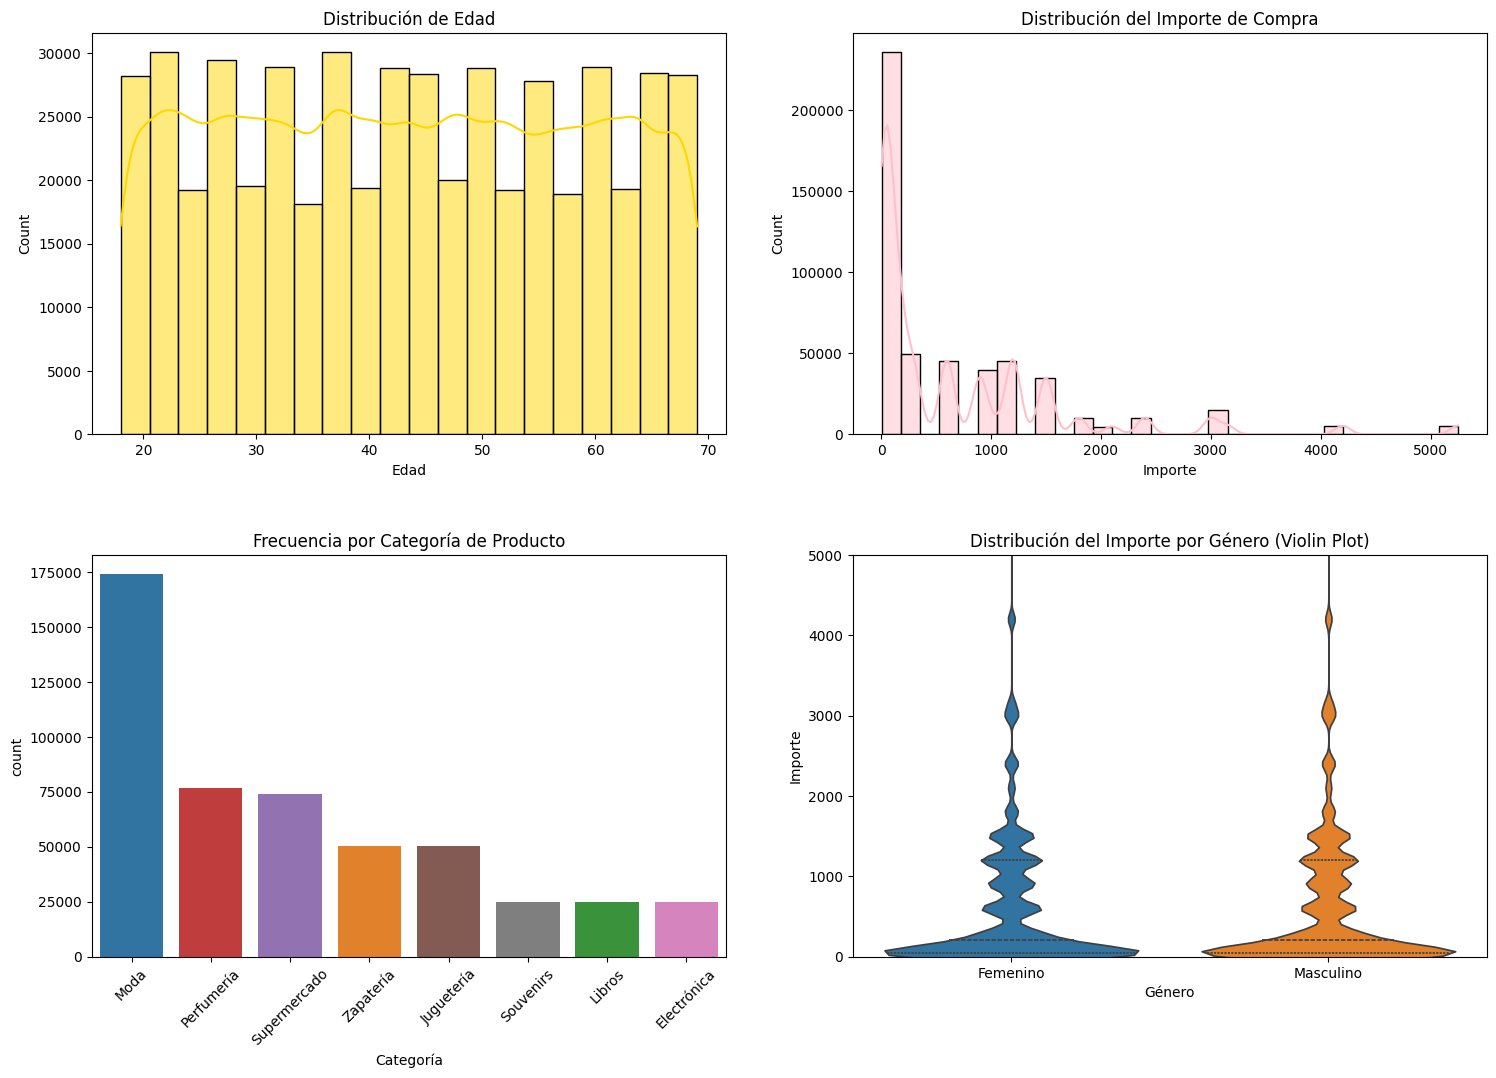

In [30]:
palette = {0: 'gold', 1: 'skyblue', 2: 'lightgreen', 3: 'lightgrey'}

plt.figure(figsize=(18, 12)) 
# Visualización: Distribución de Edad
plt.subplot(2, 2, 1)
sns.histplot(df["Edad"], bins=20, kde=True, color='gold')
plt.title("Distribución de Edad")

# Visualización: Distribución del Importe
plt.subplot(2, 2, 2)
sns.histplot(df["Importe"], bins=30, kde=True, color='pink')
plt.title("Distribución del Importe de Compra")

# Conteo por Categoría
plt.subplot(2, 2, 3)
sns.countplot(data=df, x="Categoría", order=df["Categoría"].value_counts().index, hue=df["Categoría"])
plt.title("Frecuencia por Categoría de Producto")
plt.xticks(rotation=45)

# Violin plot con límite
plt.subplot(2, 2, 4)
sns.violinplot(x="Género", y="Importe", data=df, inner="quartile",  hue=df["Género"])
plt.title("Distribución del Importe por Género (Violin Plot)")
plt.ylim(0, 5000)

plt.subplots_adjust(hspace=0.3)
plt.show()

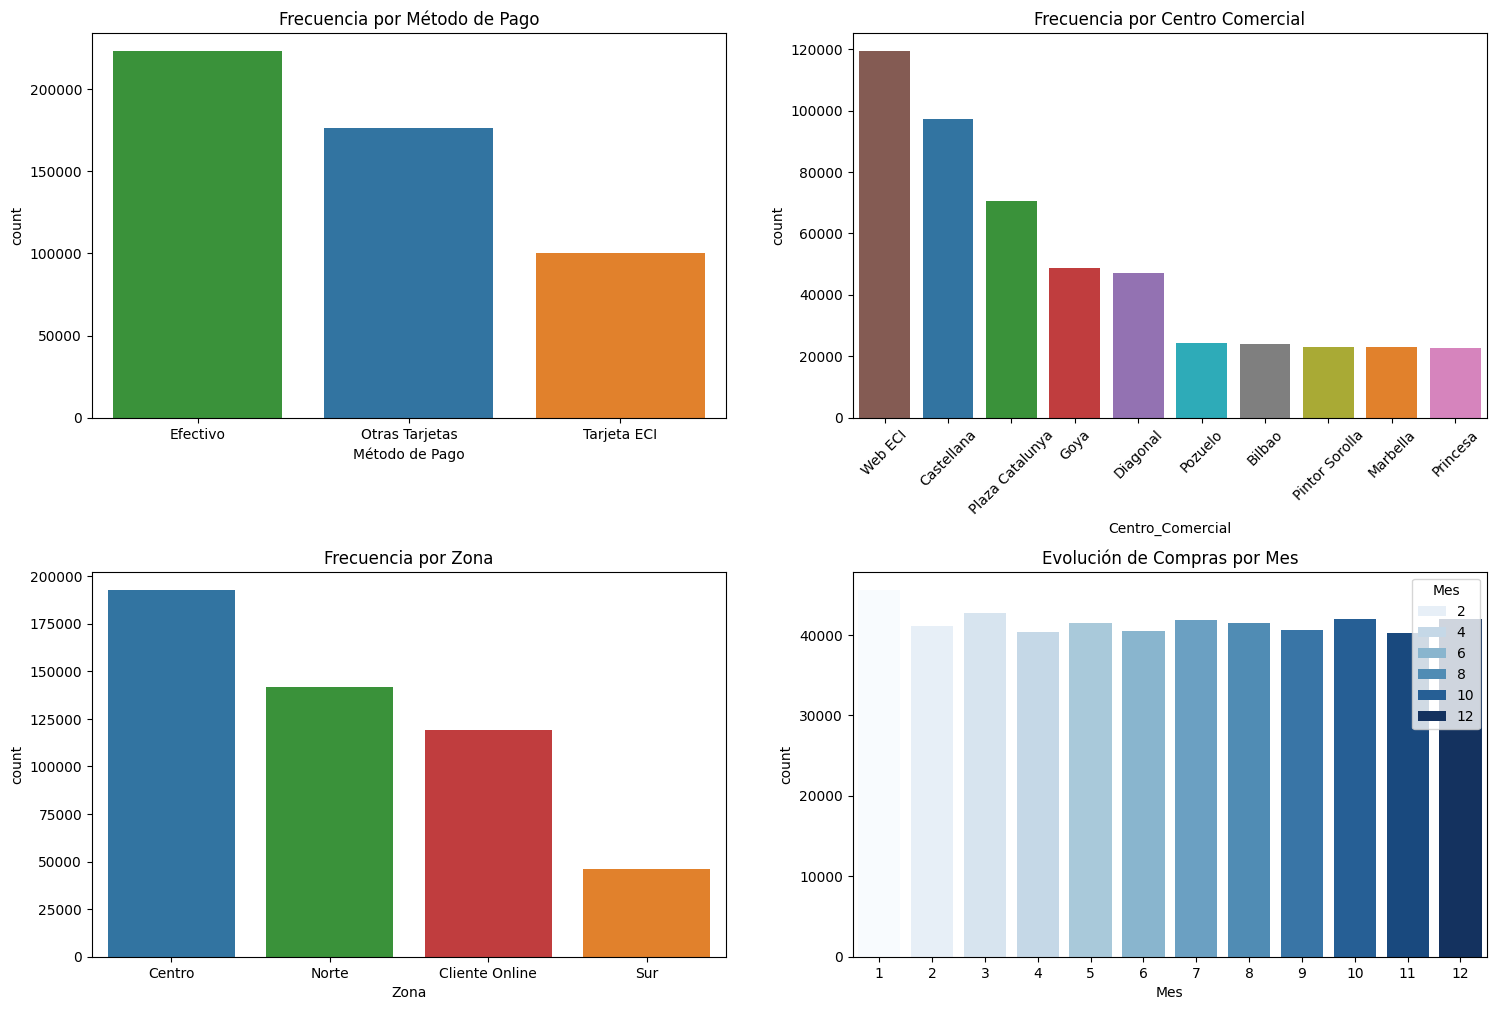

In [34]:
plt.figure(figsize=(18, 12)) 

# Conteo por Método de Pago
plt.subplot(2, 2, 1)
sns.countplot(data=df, x="Método de Pago", order=df["Método de Pago"].value_counts().index, hue=df["Método de Pago"])
plt.title("Frecuencia por Método de Pago")

# Conteo por Centro Comercial
plt.subplot(2, 2, 2)
sns.countplot(data=df, x="Centro_Comercial", order=df["Centro_Comercial"].value_counts().index, hue=df["Centro_Comercial"])
plt.title("Frecuencia por Centro Comercial")
plt.xticks(rotation=45)

# Conteo por Zona
plt.subplot(2, 2, 3)
sns.countplot(data=df, x="Zona", order=df["Zona"].value_counts().index, hue=df["Zona"])
plt.title("Frecuencia por Zona")

# Evolución mensual de compras
df["Fecha_Factura"] = pd.to_datetime(df['Fecha_Factura'], format="%d/%m/%Y")
df["Mes"] = df["Fecha_Factura"].dt.month
plt.subplot(2, 2, 4)
sns.countplot(data=df, x="Mes", palette="Blues", hue=df["Mes"])
plt.title("Evolución de Compras por Mes")

plt.subplots_adjust(hspace=0.4)
plt.show()


---

## 4. Análisis adicional por zona


Importe medio por zona:
Zona
Centro            690.931486
Cliente Online    689.687897
Norte             686.406461
Sur               686.177861
Name: Importe, dtype: float64
Categoría más frecuente por zona:
              Zona Categoría  Cuenta
3           Centro      Moda   66880
19           Norte      Moda   49442
11  Cliente Online      Moda   41668
27             Sur      Moda   16087


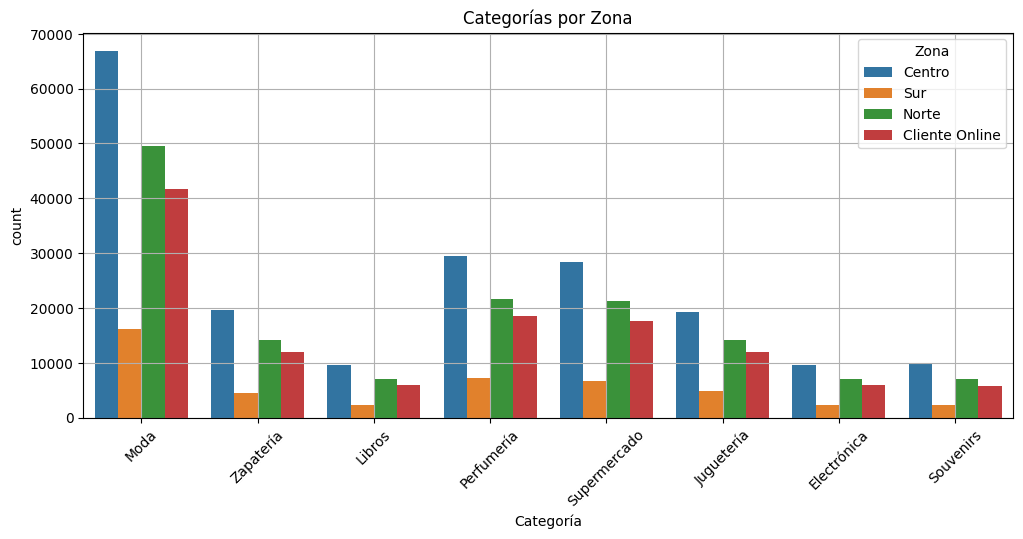

In [36]:
# Explicación: Ahora vamos a explorar cómo varía el comportamiento de los clientes según la zona.
# Esto nos ayudará a entender si la ubicación geográfica tiene influencia en el tipo de compra.

# 1. Importe medio por zona
print("Importe medio por zona:")
print(df.groupby("Zona")["Importe"].mean().sort_values(ascending=False))

# 2. Categoría más comprada por zona
print("Categoría más frecuente por zona:")
categoria_zona = df.groupby(["Zona", "Categoría"]).size().reset_index(name="Cuenta")
mas_comprada = categoria_zona.sort_values("Cuenta", ascending=False).drop_duplicates(subset="Zona")
print(mas_comprada)

# 3. Visualización de categorías más populares por zona
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x="Categoría", hue="Zona")
plt.title("Categorías por Zona")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()